# **Use rainfall measurements from NOAA stations to validate rainfall data from multiple satellite sources**

This notebook demonstrates how to use the PVRADAR SDK to compare rainfall data from NOAA meteorological stations against satellite-derived sources like MERRA2. This is useful for validating the consistency and reliability of rainfall inputs used in modeling.

In [1]:
from pvradar.sdk import PvradarSite, R, resource_plot
import matplotlib.pyplot as plt
import numpy as np

## Define Site and Interval

Specify the location and time period for which rainfall data should be validated.

In [2]:
location = 35.434, -119.055  # Bakersfield, California, USA
site = PvradarSite(location=location, interval='2020..2021')

In [3]:
site.resource(R.meteo_station_table).head(10)

datasource   station_id   latitude   longitude start_date   end_date  \
0       noaa  USW00023155  35.434240 -119.055240 2002-01-01 2025-02-22   
1       noaa  USC00040444  35.418600 -119.050800 2002-01-01 2025-02-22   
2       noaa  US1CAKN0022  35.331142 -119.107783 2015-10-02 2025-02-21   
3       noaa  US1CAKN0026  35.408836 -118.507075 2014-12-02 2025-02-14   
4       noaa  US1CAKN0031  35.146400 -118.498600 2017-09-13 2025-02-21   
5       noaa  USC00046154  34.945500 -119.682700 2002-01-01 2025-02-20   
6       noaa  US1CAKN0017  35.583176 -119.348343 2013-03-20 2025-02-21   
7       noaa  USW00023187  34.743610 -118.725280 2002-01-01 2025-02-21   
8       noaa  US1CAKN0013  35.702200 -118.173900 2002-04-22 2025-02-20   
9       noaa  USC00044957  36.203200 -119.054500 2002-01-01 2025-02-21   

   coverage  completeness      distance     score  
0       1.0      1.000000     34.462309  2.998806  
1       1.0      0.986301   1756.152291  2.850368  
2       1.0      1.000000  12411.913154  2.650402  
3       1.0      1.000000  49784.339720  2.178103  
4       1.0      0.998630  59840.904797  2.116241  
5       1.0      1.000000  78855.344445  2.065029  
6       1.0      0.953425  31342.799749  2.061570  
7       1.0      0.994521  82514.108061  2.020016  
8       1.0      0.993151  85186.854426  2.005850  
9       1.0      0.987671  85627.380390  1.969519

## Retrieve NOAA and Satellite Rainfall Data

Use PVRADAR's resource function to pull rainfall data from both NOAA stations and satellite datasets for comparison.

In [4]:
rainfall_noaa = site.resource(R.rainfall(datasource='noaa', station_id='USW00023155', to_freq='D'), label='noaa')

In [5]:
rainfall_era5 = site.resource(R.rainfall(datasource='era5', to_freq='D'), label='era5')
rainfall_merra2 = site.resource(R.rainfall(datasource='merra2', to_freq='D'), label='merra2')

## Visualize Comparison

Use `resource_plot` to visually compare the rainfall time-series from different sources.

In [6]:
resource_plot(rainfall_era5, rainfall_merra2, rainfall_noaa)

In [7]:
resource_plot(rainfall_era5.cumsum(), rainfall_merra2.cumsum(), rainfall_noaa.cumsum(), to_freq='D')

## Add custom analysis

Using the PVRADAR-SDK in jupyter notebooks allows you to quickly add your own custom analysis if needed. In this example we will add a scatter plot: measurement vs. satellite.

In [8]:
def analyse_rainfall_estimations(truth, *estimations):
    plt.figure(figsize=(6,6))
    plt.plot([truth.min(), truth.max()], [truth.min(), truth.max()], 'k--', label='1:1 line')

    for estim in estimations:
        plt.scatter(truth, estim, label=estim.attrs['label'], alpha=0.7)

        # Fit linear regression (1st degree polyfit)
        slope, intercept = np.polyfit(truth, estim, 1)
        x_vals = np.array([truth.min(), truth.max()])
        y_vals = slope * x_vals + intercept
        plt.plot(x_vals, y_vals, linestyle='-', label=f"{estim.attrs['label']} fit")

    plt.xlabel('True Rainfall [mm]')
    plt.ylabel('Satellite Rainfall [mm]')
    plt.title('True vs Satellite Rainfall')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

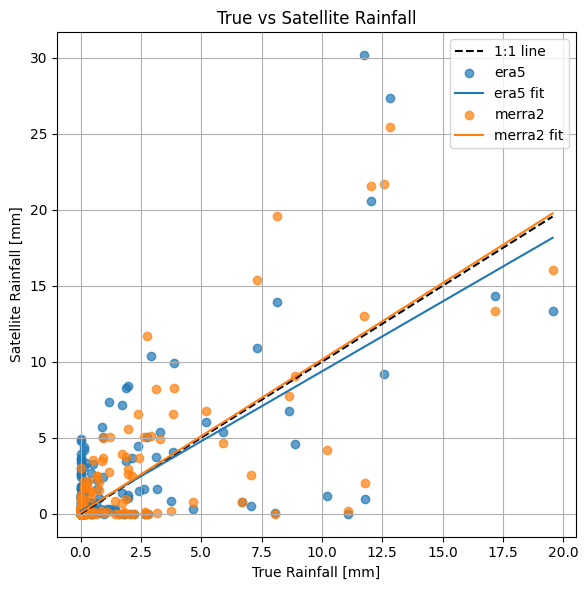

In [9]:
analyse_rainfall_estimations(rainfall_noaa, rainfall_era5, rainfall_merra2)

## Conclusion

This comparison illustrates how PVRADAR allows easy access to both ground-measured and satellite-derived resources, helping to validate and select the most reliable inputs for modeling.

# 

# **Why PVRADAR?**

## Model and optimize the real-world behavior of your PV plants

PVRADAR allows you to model the effect of **any technical or environmental factor** on plant performance — not just rainfall:
- Combine rainfall, snow, soiling, albedo, clipping, battery storage, and more in a single modeling workflow.
- Quantify impacts in terms of energy yield, PR, LCOE, and financial KPIs.
- Explore what-if scenarios and optimize plant design and O&M strategies.

## Build internal tools and advanced applications

With PVRADAR, you can turn your models into robust, organization-wide tools:
- Build internal web apps that allow colleagues to apply validated models without writing code.
- Standardize modeling across teams and projects.
- Automate reporting and performance analysis to save time and ensure consistency.

## One Python line away from your data

The PVRADAR SDK simplifies data access:
- Seamlessly connect to satellite data, meteo stations, and internal performance databases.
- Standardize and pre-process data for modeling — ready to use in one line of Python.
- Keep full control over your data, whether in the cloud or on-premises.

## Supported by deep expertise

PVRADAR is more than software — it is backed by industry-leading expertise:
- Model validation and tuning with high-quality reference data.
- Consulting and support on snow losses, soiling, O&M optimization, and yield forecasting.
- Proven track record with leading IPPs, developers, and consultants.

👉 **Ready to go further?** [**Contact us to learn how we can help solve your modeling challenge!**](https://pvradar.com/contact)